In [1]:

import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up display options for Pandas
pd.set_option("display.float_format", "{:.6f}".format)

In [2]:
# File path to the results CSV, update based on the path to your results file
results_file = "/Users/mirayozcan/Desktop/vidur_copy/vidur/simulator_output/exp1-numrequests-power-energy/experiment_results_summary.csv"

# Check if the file exists
if not os.path.exists(results_file):
    raise FileNotFoundError(f"Results file not found: {results_file}")

In [3]:
# Load the data
df = pd.read_csv(results_file)

# Display the first few rows
display(df.head())

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

,model,num_parameters,num_requests,mfu_mean,average_power_watts,total_energy_kwh,average_energy_per_request,total_gpu_hrs,execution_time_s
0,meta-llama/Meta-Llama-3-8B,8000000000.000000,256,4.884574,152.108917,0.015245,0.000060,0.031761,114.338465
1,meta-llama/Meta-Llama-3-8B,8000000000.000000,512,5.002298,152.674960,0.033866,0.000066,0.070555,253.998688
2,meta-llama/Meta-Llama-3-8B,8000000000.000000,768,5.038872,152.786089,0.049424,0.000064,0.102967,370.681753
3,meta-llama/Meta-Llama-3-8B,8000000000.000000,1024,5.120819,153.371202,0.062910,0.000061,0.131063,471.825316
4,meta-llama/Meta-Llama-3-8B,8000000000.000000,1536,5.093770,152.945815,0.099873,0.000065,0.208069,749.046988



Missing values in dataset:
model                         0
num_parameters                0
num_requests                  0
mfu_mean                      0
average_power_watts           0
total_energy_kwh              0
average_energy_per_request    0
total_gpu_hrs                 0
execution_time_s              0
dtype: int64

Summary Statistics:


,num_parameters,num_requests,mfu_mean,average_power_watts,total_energy_kwh,average_energy_per_request,total_gpu_hrs,execution_time_s
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,35462500000.000000,11946.666667,3.827878,139.454558,6.693454,0.000563,13.944695,17536.939193
std,28842324357.959572,17180.931993,1.324934,11.597904,15.412365,0.000580,32.109093,31363.390486
min,2700000000.000000,256.000000,2.323359,125.284180,0.009284,0.000036,0.019343,69.633609
25%,7750000000.000000,1024.000000,2.463947,126.807435,0.247283,0.000064,0.515174,1339.508340
50%,27000000000.000000,4096.000000,3.714409,140.424235,1.041359,0.000211,2.169498,4782.998522
75%,70000000000.000000,16384.000000,4.897362,149.474125,4.352511,0.001267,9.067732,16752.431454
max,72000000000.000000,65536.000000,6.036368,155.895899,88.784360,0.001431,184.967416,166470.674446


In [4]:
# Convert model names to a simpler format
df["model_name"] = df["model"].apply(lambda x: x.split("/")[-1])  # Extract last part of model path

# Set seaborn style
sns.set_theme(style="whitegrid")

# Define colors for different models
palette = sns.color_palette("husl", len(df["model_name"].unique()))

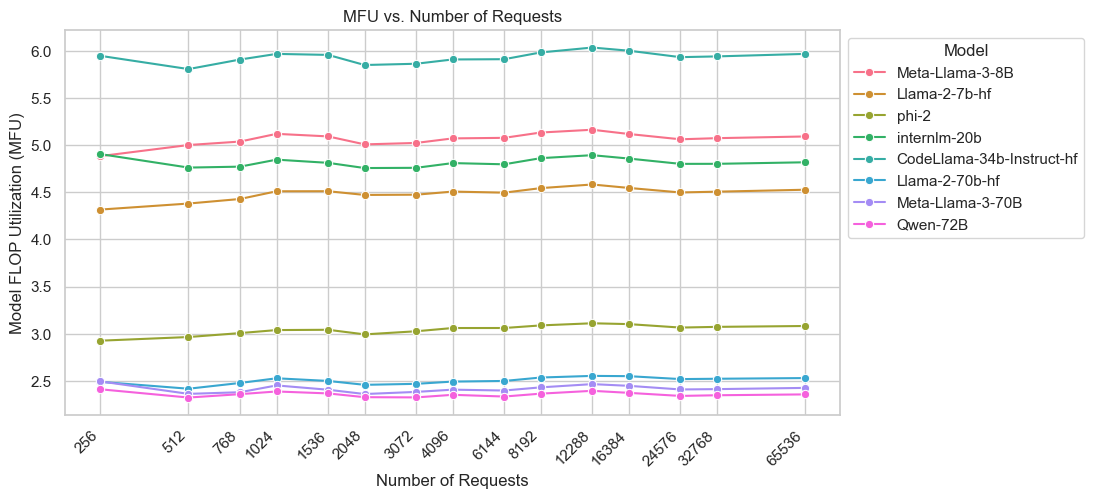

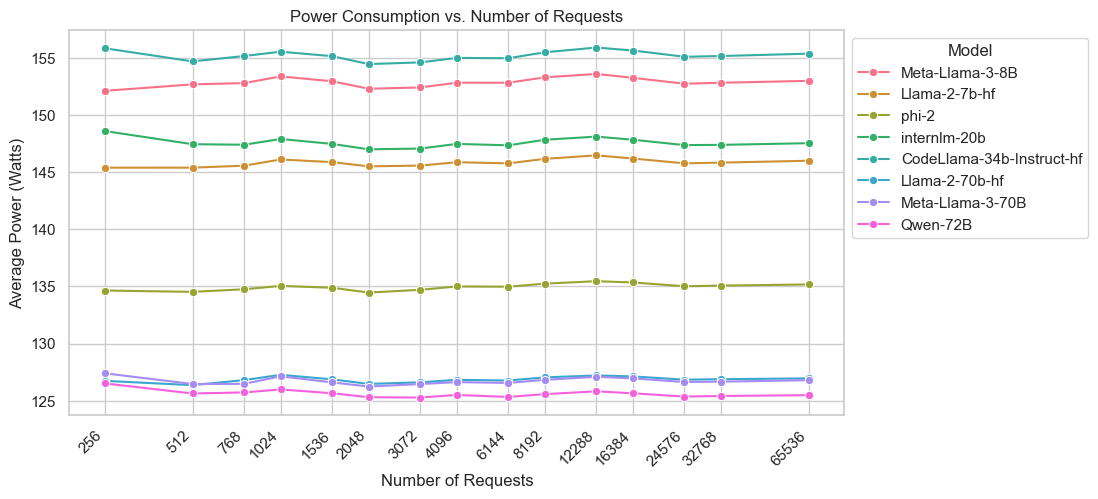

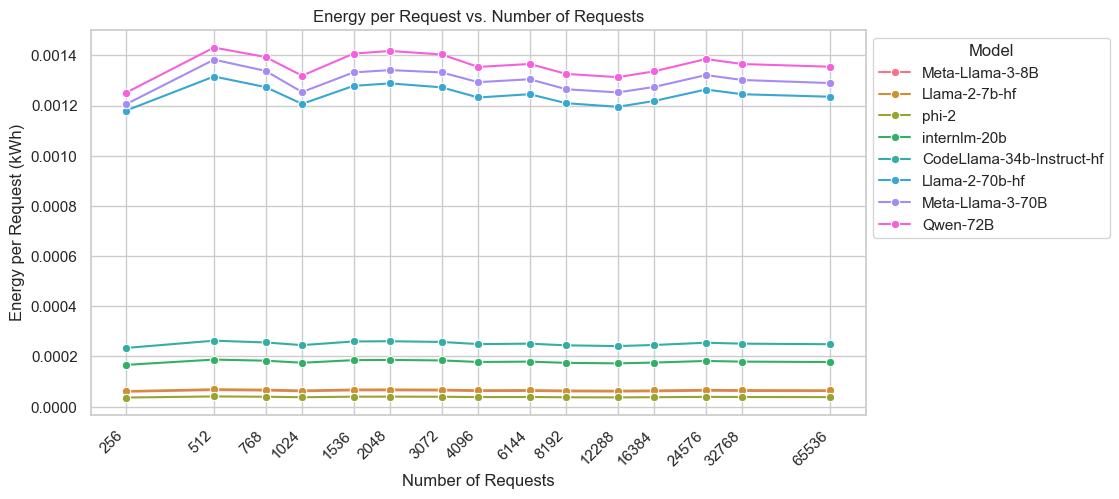

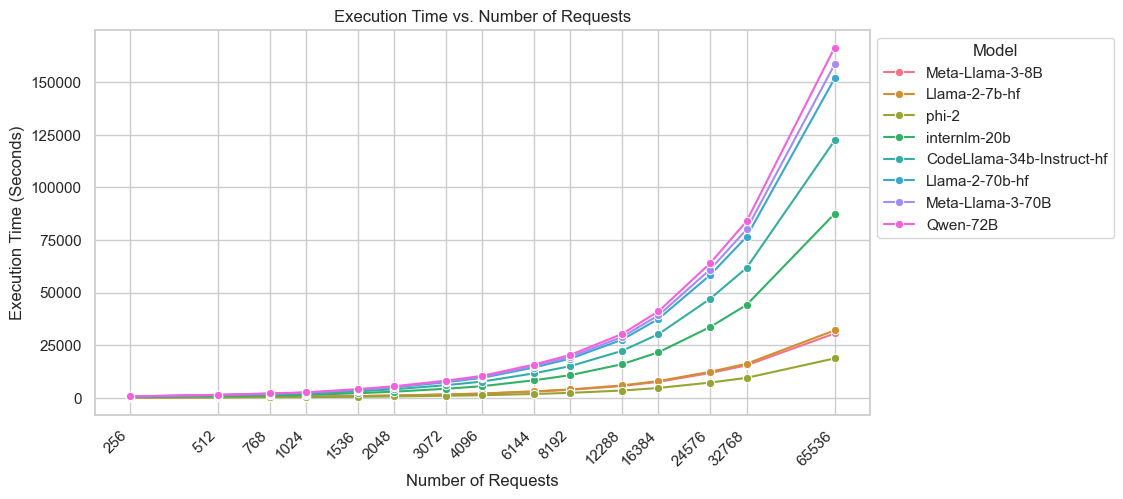

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define unique request sizes for proper x-axis labeling
request_sizes = sorted(df["num_requests"].unique())

# Function to format x-axis with all request sizes
def format_xticks(ax):
    ax.set_xscale("log", base=2)  # Set log base 2 scale
    ax.set_xticks(request_sizes)
    ax.set_xticklabels(request_sizes, rotation=45, ha="right")

# Generic function to plot a given metric vs. request size
def plot_metric_vs_requests(df, metric, y_label, title):
    plt.figure(figsize=(10, 5))
    ax = sns.lineplot(data=df, x="num_requests", y=metric, hue="model_name", palette=palette, marker="o")
    format_xticks(ax)
    plt.xlabel("Number of Requests")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title="Model", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

# Generate all plots using the function
plot_metric_vs_requests(df, "mfu_mean", "Model FLOP Utilization (MFU)", "MFU vs. Number of Requests")
plot_metric_vs_requests(df, "average_power_watts", "Average Power (Watts)", "Power Consumption vs. Number of Requests")
plot_metric_vs_requests(df, "average_energy_per_request", "Energy per Request (kWh)", "Energy per Request vs. Number of Requests")
plot_metric_vs_requests(df, "execution_time_s", "Execution Time (Seconds)", "Execution Time vs. Number of Requests")

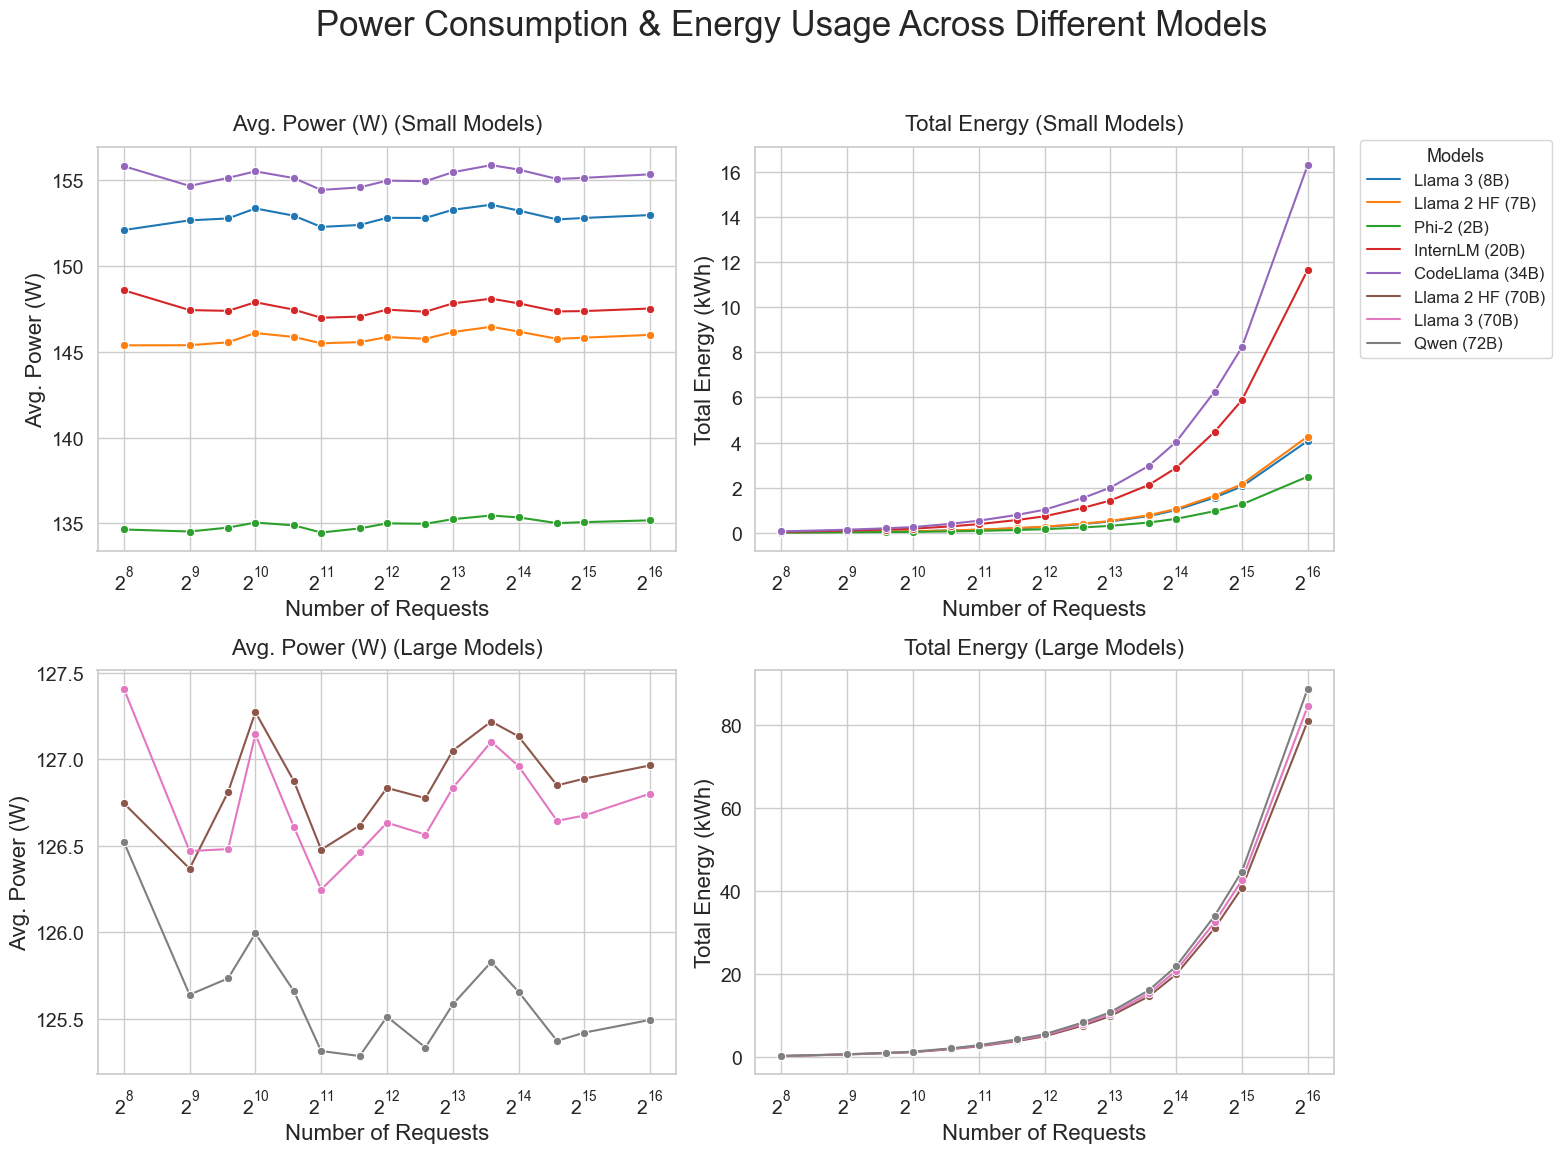

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------------------
# 1. Rename Models for Readability
# ---------------------------------------
small_models = [
    "meta-llama/Meta-Llama-3-8B",
    "meta-llama/Llama-2-7b-hf",
    "microsoft/phi-2",
    "internlm/internlm-20b",
    "codellama/CodeLlama-34b-Instruct-hf"
]
large_models = [
    "meta-llama/Llama-2-70b-hf",
    "meta-llama/Meta-Llama-3-70B",
    "Qwen/Qwen-72B"
]

model_rename_map = {
    "meta-llama/Meta-Llama-3-8B": "Llama 3 (8B)",
    "meta-llama/Llama-2-7b-hf": "Llama 2 HF (7B)",
    "microsoft/phi-2": "Phi-2 (2B)",
    "internlm/internlm-20b": "InternLM (20B)",
    "codellama/CodeLlama-34b-Instruct-hf": "CodeLlama (34B)",
    "meta-llama/Llama-2-70b-hf": "Llama 2 HF (70B)",
    "meta-llama/Meta-Llama-3-70B": "Llama 3 (70B)",
    "Qwen/Qwen-72B": "Qwen (72B)"
}
df["model_renamed"] = df["model"].map(model_rename_map)

# ---------------------------------------
# 2. Filter DataFrames
# ---------------------------------------
df_small = df[df["model"].isin(small_models)].copy()
df_large = df[df["model"].isin(large_models)].copy()

if df_small.empty:
    print("⚠️ Warning: No data found for small models!")
if df_large.empty:
    print("⚠️ Warning: No data found for large models!")

# ---------------------------------------
# 3. Plot Setup
# ---------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 

# Combined model list and color palette
df_all = pd.concat([df_small, df_large])
all_models = df_all["model_renamed"].unique()
palette = sns.color_palette("tab10", n_colors=len(all_models))
model_palette = dict(zip(all_models, palette))

# ---------------------------------------
# 4. Plot Function
# ---------------------------------------
def plot_lineplot(data, x_col, y_col, ax, title, y_label):
    sns.lineplot(
        data=data, x=x_col, y=y_col,
        hue="model_renamed", marker="o",
        ax=ax, palette=model_palette
    )
    ax.set_xscale("log", base=2)
    ax.set_xlabel("Number of Requests", fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_title(title, fontsize=16, pad=12)
    ax.tick_params(axis='both', labelsize=14)
    ax.get_legend().remove()

# Plot all subplots
plot_lineplot(df_small, "num_requests", "average_power_watts", axes[0, 0], "Avg. Power (W) (Small Models)", "Avg. Power (W)")
plot_lineplot(df_small, "num_requests", "total_energy_kwh", axes[0, 1], "Total Energy (Small Models)", "Total Energy (kWh)")
plot_lineplot(df_large, "num_requests", "average_power_watts", axes[1, 0], "Avg. Power (W) (Large Models)", "Avg. Power (W)")
plot_lineplot(df_large, "num_requests", "total_energy_kwh", axes[1, 1], "Total Energy (Large Models)", "Total Energy (kWh)")

# ---------------------------------------
# 5. Shared Legend
# ---------------------------------------
dummy_fig, dummy_ax = plt.subplots()
for model in all_models:
    dummy_ax.plot([], [], label=model, color=model_palette[model])
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)

fig.legend(
    handles, labels,
    loc='center right',
    bbox_to_anchor=(0.98, 0.76),
    title="Models",
    fontsize=12,
    title_fontsize=13,
    frameon=True
)

# ---------------------------------------
# 6. Final Touches
# ---------------------------------------
plt.suptitle("Power Consumption & Energy Usage Across Different Models", fontsize=25, y=0.96)
plt.tight_layout(rect=[0, 0, 0.85, 0.93])
plt.show()

In [7]:
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.colors import rgb2hex
import plotly.io as pio

# Define model categories
small_models = [
    "meta-llama/Meta-Llama-3-8B",
    "meta-llama/Llama-2-7b-hf",
    "microsoft/phi-2",
    "internlm/internlm-20b",
    "codellama/CodeLlama-34b-Instruct-hf"
]
large_models = [
    "meta-llama/Llama-2-70b-hf",
    "meta-llama/Meta-Llama-3-70B",
    "Qwen/Qwen-72B"
]

# Rename models for better readability
model_rename_map = {
    "meta-llama/Meta-Llama-3-8B":    "Llama 3 (8B)",
    "meta-llama/Llama-2-7b-hf":     "Llama 2 HF (7B)",
    "microsoft/phi-2":              "Phi-2 (2B)",
    "internlm/internlm-20b":        "InternLM (20B)",
    "codellama/CodeLlama-34b-Instruct-hf": "CodeLlama (34B)",
    "meta-llama/Llama-2-70b-hf":    "Llama 2 HF (70B)",
    "meta-llama/Meta-Llama-3-70B":  "Llama 3 (70B)",
    "Qwen/Qwen-72B":                "Qwen (72B)"
}
df["model_renamed"] = df["model"].map(model_rename_map)

# Separate small and large
df_small = df[df["model"].isin(small_models)].copy()
df_large = df[df["model"].isin(large_models)].copy()

# Warning checks
if df_small.empty:
    print("⚠️ Warning: No data found for small models!")
if df_large.empty:
    print("⚠️ Warning: No data found for large models!")

# Combine for consistent coloring across all models
df_all = pd.concat([df_small, df_large])
all_models = df_all["model_renamed"].unique()

# -------------------------------------------
# 2. Create a tab10 color palette for Plotly
# -------------------------------------------
# Get the tab10 colors from Seaborn, then convert to hex
tab10_palette = sns.color_palette("tab10", n_colors=len(all_models))
tab10_hex = [rgb2hex(color) for color in tab10_palette]
model_color_map = dict(zip(all_models, tab10_hex))

# ----------------------------------
# 3. Set up Plotly subplots (2x2)
# ----------------------------------
fig = make_subplots(
    rows=2, 
    cols=2,
    subplot_titles=[
        "Avg. Power (W) (Small Models)",
        "Total Energy (Small Models)",
        "Avg. Power (W) (Large Models)",
        "Total Energy (Large Models)",
    ],
    vertical_spacing=0.15,
    horizontal_spacing=0.10
)

# Track which models have appeared, so each model shows up in the legend once
used_legend = set()

# ---------------------------------------
# 4. Helper function to add line traces
# ---------------------------------------
def add_line_traces(data, row, col, y_col, y_label):
    # Sort data by num_requests so lines go in order
    data = data.sort_values(by="num_requests")
    
    for model in data["model_renamed"].unique():
        model_data = data[data["model_renamed"] == model]
        
        # Hover text details
        hover_text = [
            f"Model: {model}<br>"
            f"Requests: {nr}<br>"
            f"Avg. Power: {pw:.2f} W<br>"
            f"Total Energy: {en:.2f} kWh<br>"
            f"Execution Time: {et:.2f} s"
            for nr, pw, en, et in zip(
                model_data["num_requests"],
                model_data["average_power_watts"],
                model_data["total_energy_kwh"],
                model_data["execution_time_s"]
            )
        ]
        
        show_legend_for_this_trace = False
        if model not in used_legend:
            show_legend_for_this_trace = True
            used_legend.add(model)
        
        fig.add_trace(
            go.Scatter(
                x=model_data["num_requests"],
                y=model_data[y_col],
                mode="lines+markers",
                name=model,
                marker=dict(size=8),
                line=dict(color=model_color_map[model]),
                hoverinfo="text",
                hovertext=hover_text,
                showlegend=show_legend_for_this_trace,
                legendgroup=model  # ensures consistent legend grouping
            ),
            row=row,
            col=col
        )

# ------------------------------------------------
# 5. Add traces for small (top row) and large (bottom row)
# ------------------------------------------------
add_line_traces(df_small, 1, 1, "average_power_watts", "Avg. Power (W)")
add_line_traces(df_small, 1, 2, "total_energy_kwh", "Total Energy (kWh)")
add_line_traces(df_large, 2, 1, "average_power_watts", "Avg. Power (W)")
add_line_traces(df_large, 2, 2, "total_energy_kwh", "Total Energy (kWh)")

# ------------------------------------------------
# 6. Style & Layout Updates
# ------------------------------------------------
fig.update_layout(
    title_text="Power Consumption & Energy Usage Across Different Models",
    title_x=0.5,
    title_y=0.98,
    title_font=dict(size=18),
    width=1300,
    height=900,
    margin=dict(l=60, r=230, t=100, b=80),  # extra space on right for legend
    hovermode="x unified"
)

# Legend on the right, centered vertically
fig.update_layout(
    legend=dict(
        title="Models",
        x=1.05,           
        xanchor="left",
        y=0.5,
        yanchor="middle",
        orientation="v",
        font=dict(size=12),
        bordercolor="gray",
        borderwidth=1
    )
)

# ------------------------------------------------
# 7. Axis Labels and "Power-of-2" x-axis ticks
# ------------------------------------------------
max_requests = df_all["num_requests"].max()
if max_requests < 2:
    # Edge case if your data never exceeds 1
    tickvals = [1]
    ticktext = ["1"]
else:
    max_pow = math.ceil(math.log2(max_requests))
    tickvals = [2**i for i in range(max_pow + 1)]
    # Display ticks as exponent notation: "2^0", "2^1", etc.
    ticktext = [f"2<sup>{i}</sup>" for i in range(max_pow + 1)]

# Apply these settings to all x-axes
for i in range(1, 5):
    fig.update_xaxes(
        type="log",
        tickmode="array",
        tickvals=tickvals,
        ticktext=ticktext,      # shows powers of 2 on the axis
        title_text="Number of Requests",
        title_font=dict(size=12),
        row=(i+1)//2,
        col=2 if i % 2 == 0 else 1,
    )

# Y-axis labels
fig.update_yaxes(title_text="Avg. Power (W)", row=1, col=1, title_font=dict(size=12))
fig.update_yaxes(title_text="Total Energy (kWh)", row=1, col=2, title_font=dict(size=12))
fig.update_yaxes(title_text="Avg. Power (W)", row=2, col=1, title_font=dict(size=12))
fig.update_yaxes(title_text="Total Energy (kWh)", row=2, col=2, title_font=dict(size=12))

# ---------------------
# 8. Show the figure
# ---------------------
fig.show()